In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('~/python_project/heart.csv')


In [12]:
# 1. Загрузка данных и проверка информации
df = pd.read_csv('heart.csv')

print("Информация о данных:")
print(df.info())
print("Расчет основных статистических показателей:")
print(df.describe())
print("\nПроверка пропусков:")
print(df.isnull().sum())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
Расчет основных статистических показателей:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  3

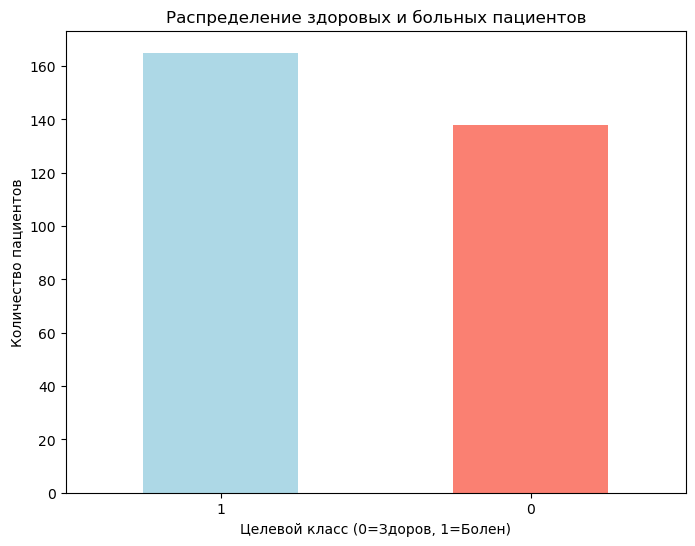

In [13]:
# 2. Столбчатая диаграмма количества здоровых и больных пациентов
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Распределение здоровых и больных пациентов')
plt.xlabel('Целевой класс (0=Здоров, 1=Болен)')
plt.ylabel('Количество пациентов')
plt.xticks(rotation=0)
plt.show()


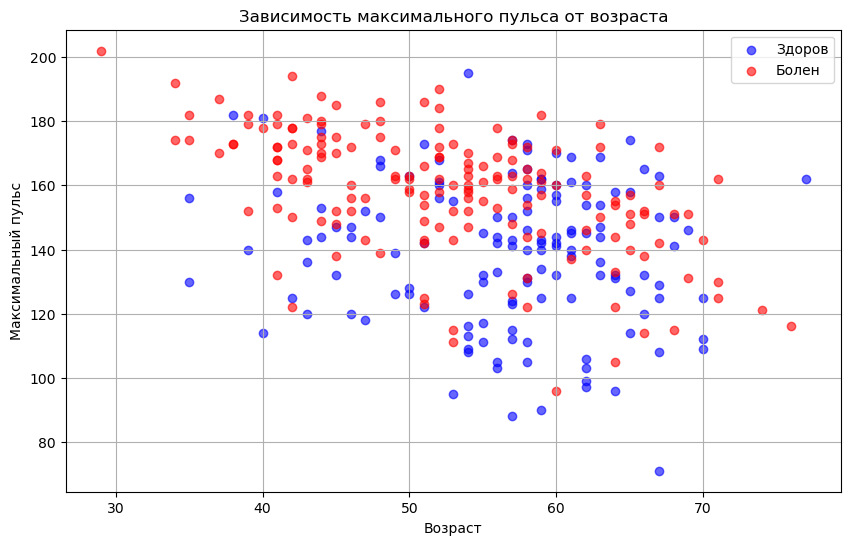

In [15]:
# 3. Диаграмма рассеяния: максимальный пульс vs возраст
plt.figure(figsize=(10, 6))
colors = ['blue', 'red']  # Синий для здоровых, красный для больных
for target_value in [0, 1]:
    subset = df[df['target'] == target_value]
    plt.scatter(subset['age'], subset['thalach'],
               c=colors[target_value],
               label='Здоров' if target_value == 0 else 'Болен',
               alpha=0.6)
plt.title('Зависимость максимального пульса от возраста')
plt.xlabel('Возраст')
plt.ylabel('Максимальный пульс')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# 4. Преобразование признака sex
df['sex_category'] = df['sex'].map({0: 'female', 1: 'male'})
sex_encoded = pd.get_dummies(df['sex_category'], prefix='sex')
df = pd.concat([df, sex_encoded], axis=1)
print("\nДанные после One-Hot Encoding для пола:")
print(df[['sex', 'sex_category', 'sex_female', 'sex_male']].head())


Данные после One-Hot Encoding для пола:
   sex sex_category  sex_female  sex_male
0    1         male       False      True
1    1         male       False      True
2    0       female        True     False
3    1         male       False      True
4    0       female        True     False


In [8]:
# 5. Средний уровень холестерина для больных и здоровых
mean_chol_by_target = df.groupby('target')['chol'].mean()
print(f"\nСредний уровень холестерина:")
print(f"Здоровые пациенты (target=0): {mean_chol_by_target[0]:.2f}")
print(f"Больные пациенты (target=1): {mean_chol_by_target[1]:.2f}")


Средний уровень холестерина:
Здоровые пациенты (target=0): 251.09
Больные пациенты (target=1): 242.23


In [9]:
# 6. Минимаксная нормализация признаков
features_to_normalize = ['age', 'trestbps', 'chol', 'thalach']

print("\nДанные ДО нормализации:")
print(df[features_to_normalize].describe())

# Минимаксная нормализация по примеру
for column in features_to_normalize:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

print("\nДанные ПОСЛЕ минимаксной нормализации:")
print(df[features_to_normalize].describe())

print("\nПервые 5 строк после нормализации:")
print(df[features_to_normalize].head())


Данные ДО нормализации:
              age    trestbps        chol     thalach
count  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865
std      9.082101   17.538143   51.830751   22.905161
min     29.000000   94.000000  126.000000   71.000000
25%     47.500000  120.000000  211.000000  133.500000
50%     55.000000  130.000000  240.000000  153.000000
75%     61.000000  140.000000  274.500000  166.000000
max     77.000000  200.000000  564.000000  202.000000

Данные ПОСЛЕ минимаксной нормализации:
              age    trestbps        chol     thalach
count  303.000000  303.000000  303.000000  303.000000
mean     0.528465    0.354941    0.274575    0.600358
std      0.189210    0.165454    0.118335    0.174849
min      0.000000    0.000000    0.000000    0.000000
25%      0.385417    0.245283    0.194064    0.477099
50%      0.541667    0.339623    0.260274    0.625954
75%      0.666667    0.433962    0.339041    0.725191
max      1.000000